# PROJET DE VISUALISATION DES DONNEES DE FORD GOBIKE

## Présenté par Amen K. ANONWODJI

# Table des matières
<ul>
<li><a href="#introduction">Introduction</a></li>
<li><a href="#analyse">Analyse Exploratoire des données</a></li>
<li><a href="#nettoyage">Nettoyage de données</a></li>
<li><a href="#visualisation">Visualisation des données</a></li>    
<li><a href="#conclusion">Conclusion</a></li>
<li><a href="#limites">Limites</a></li>    
</ul>

<a id='introduction'></a>
# Introduction

L'objectif de ce présent projet est d'analyser et de visualiser les données de FordGobike. Cet ensemble de données comprend des informations sur les trajets individuels effectués dans un système de partage de vélos couvrant la grande région de la baie de San Francisco. Le jeu de données contient seize (16) variables et 183412 observations. 

<a id='visualisation'></a>
# Visualisation des données

## Exploration Univariée

Dans cette section, nous allons étudier les distributions des variables individuelles d'intérêt.

### Quelle est la distribution pour le type d'utilisateur ?

E:\ANACONDA\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


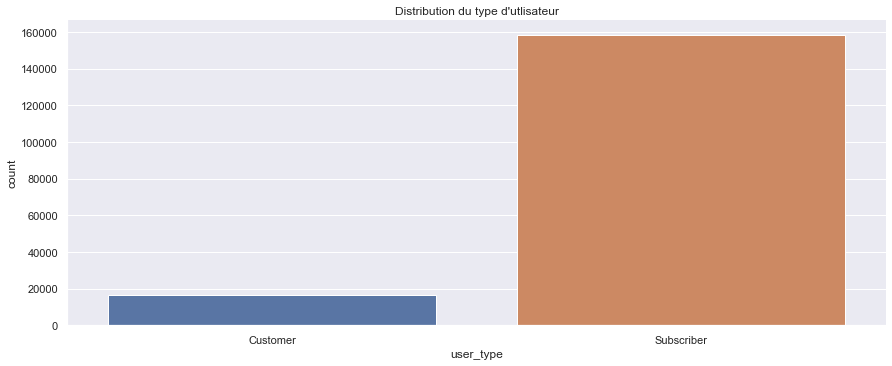

In [32]:
# Diagramme en barre de la variable user_type
sns.factorplot(x = 'user_type', data=data , kind = 'count',aspect = 2.5);
plt.title("Distribution du type d'utlisateur");

- Le graphique ci-dessus révèle que la majorité des utilisateurs sont des abonnés.

### Quelle est la distribution du genre ?

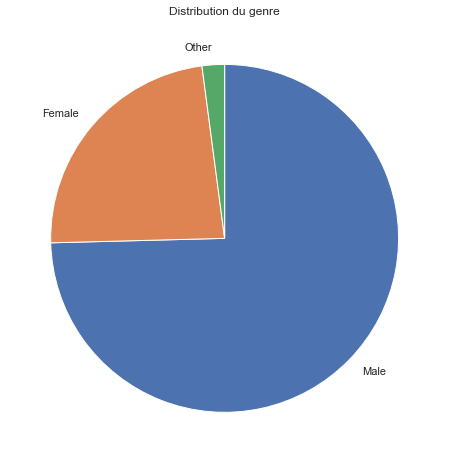

In [33]:
# Obtenir le décompte des valeurs du genre
gender_count = data.member_gender.value_counts()

# Diagramme circulaire de la distribution du genre
plt.pie(gender_count, labels = gender_count.index, startangle = 90, counterclock = False);
plt.title("Distribution du genre")
fig=plt.gcf()
fig.set_size_inches(8, 8)
plt.show();

- Le graphique ci-dessus montre que la majorité des utilisateurs sont des hommes. Ensuite viennent les femmes. Les personnes d'autres sexe n'empruntent pas vraiment les services vélo.

### La colonne âge comporte t-il de valeures aberrantes ?

L'histogramme de la distribution des âges des utilisateurs ne montrent pas clairement si la colonne **age** contient des valeurs aberrantes ou non. Nous allons donc construire la boîte à moustache pour détecter les valeurs aberrantes au cas où elles existent.

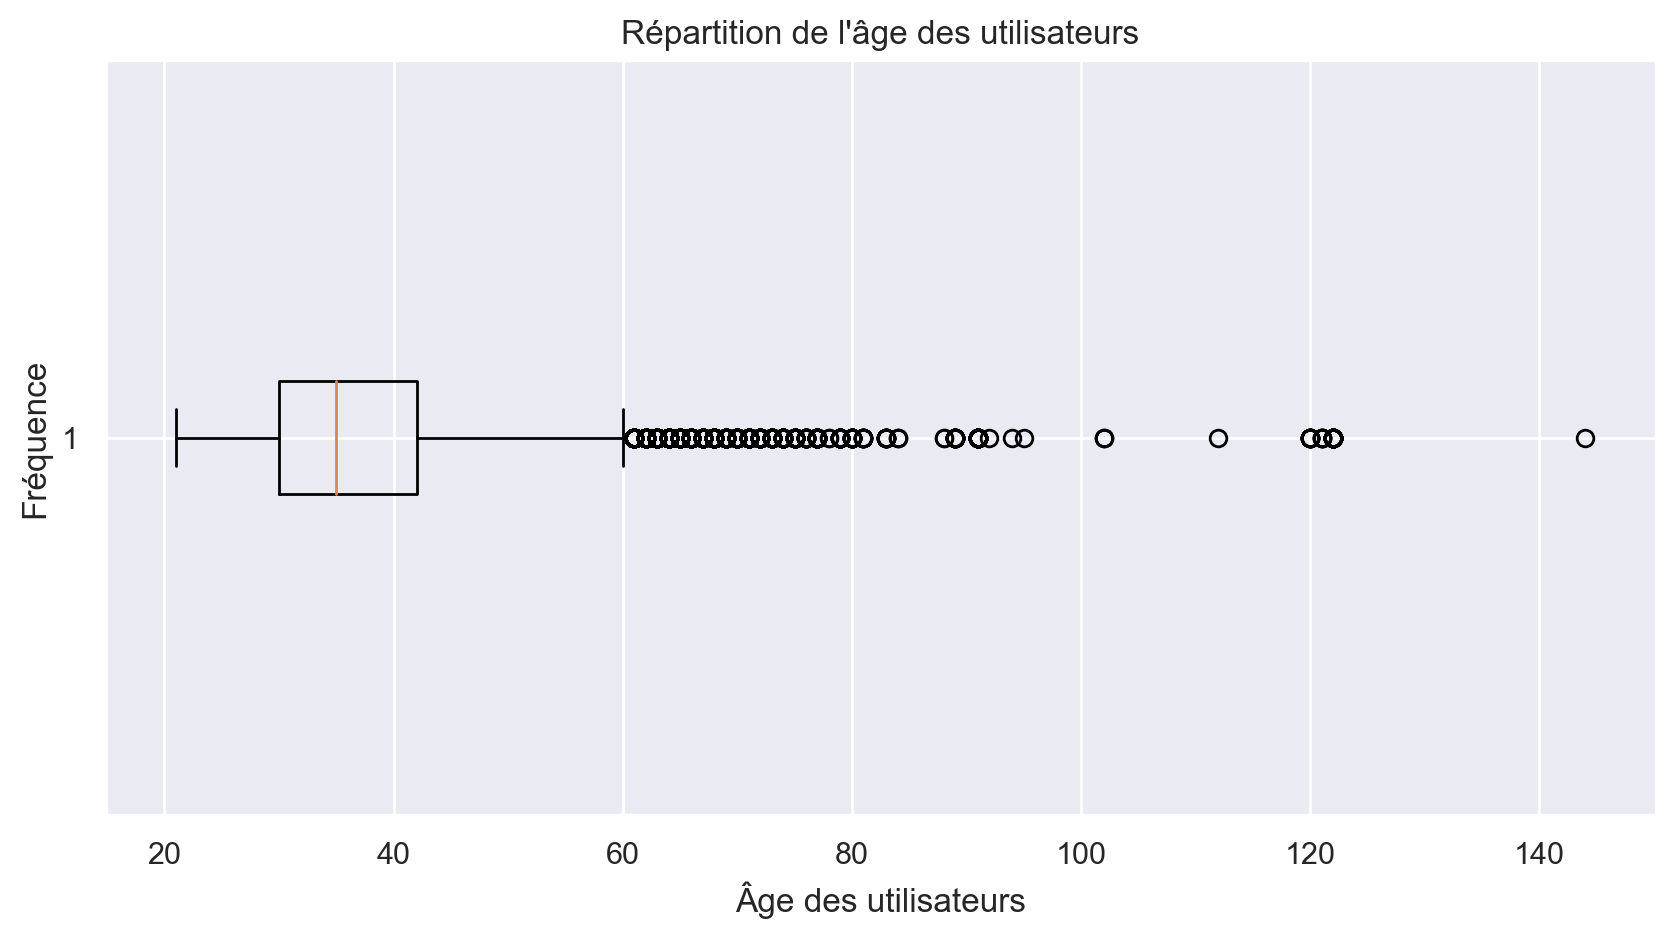

In [36]:
# Boîte à moustache de la colonne âge
plt.figure(figsize = (10, 5), dpi = 200)

plt.boxplot(data['age'], vert=False)
plt.xlabel("Âge des utilisateurs")
plt.ylabel('Fréquence')
plt.title("Répartition de l'âge des utilisateurs")

plt.show();

- La boîte à moustache montre quelques valeurs aberrantes pour la colonne âge de l'utilisateur. L'âge maximal de 140 ans observé est une valeur aberrante.

## Exploration Bivariée

Examinons maintenant les relations entre deux variables de notre jeu de données.

### Quelle est la durée moyenne de trajet pour les catégories de type d'usagers ?

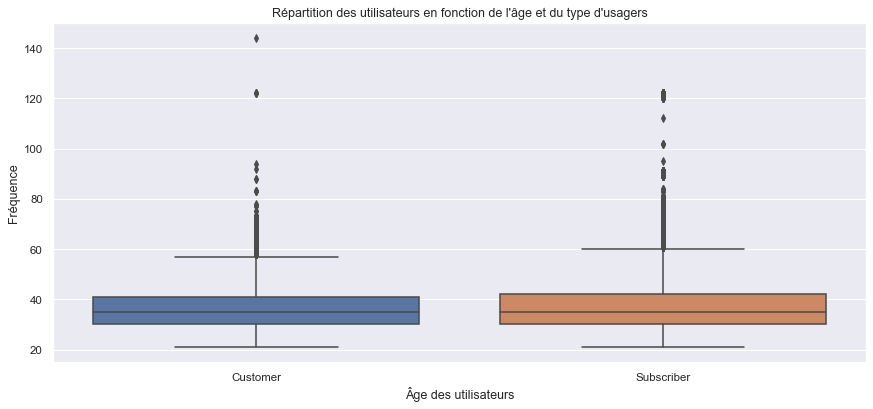

In [41]:
# Répartition de l'âge par type d'utilisateur

plt.figure(figsize = (14, 6), dpi = 75)
sns.boxplot(data = data, x = 'user_type', y = 'age')
plt.xlabel('Âge des utilisateurs')
plt.ylabel('Fréquence')
plt.title("Répartition des utilisateurs en fonction de l'âge et du type d'usagers")
plt.show();

- Les clients effectuent un voyage plus long en vélo que les abonnés.

### Quelle est la durée du trajet pour chaque genre en minutes ?

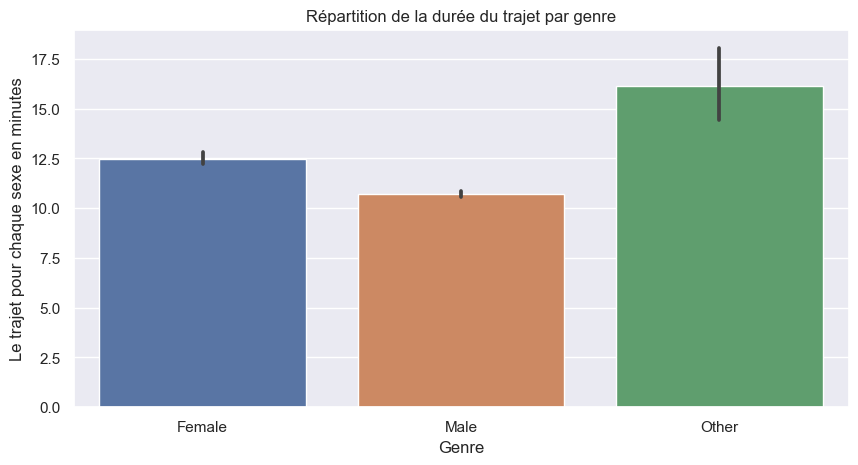

In [42]:
# Répartition de la durée par genre

plt.figure(figsize = (10, 5), dpi = 100)
sns.barplot(data = data, x = "member_gender", y = "duration_min")
plt.xlabel('Genre')
plt.ylabel('Le trajet pour chaque sexe en minutes')
plt.title("Répartition de la durée du trajet par genre")
plt.show();

- Les temps de trajet plus courts sont pour les utilisateurs masculins.

- Les clients ont toujours des trajets plus longs que les abonnés.

## Exploration Multivariée

Dans cette partie, nous allons créer des graphiques de trois variables ou plus pour approfondir nos analyses.

### Quelle est la corrélation entre chaque variable de l'ensemble de données ?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


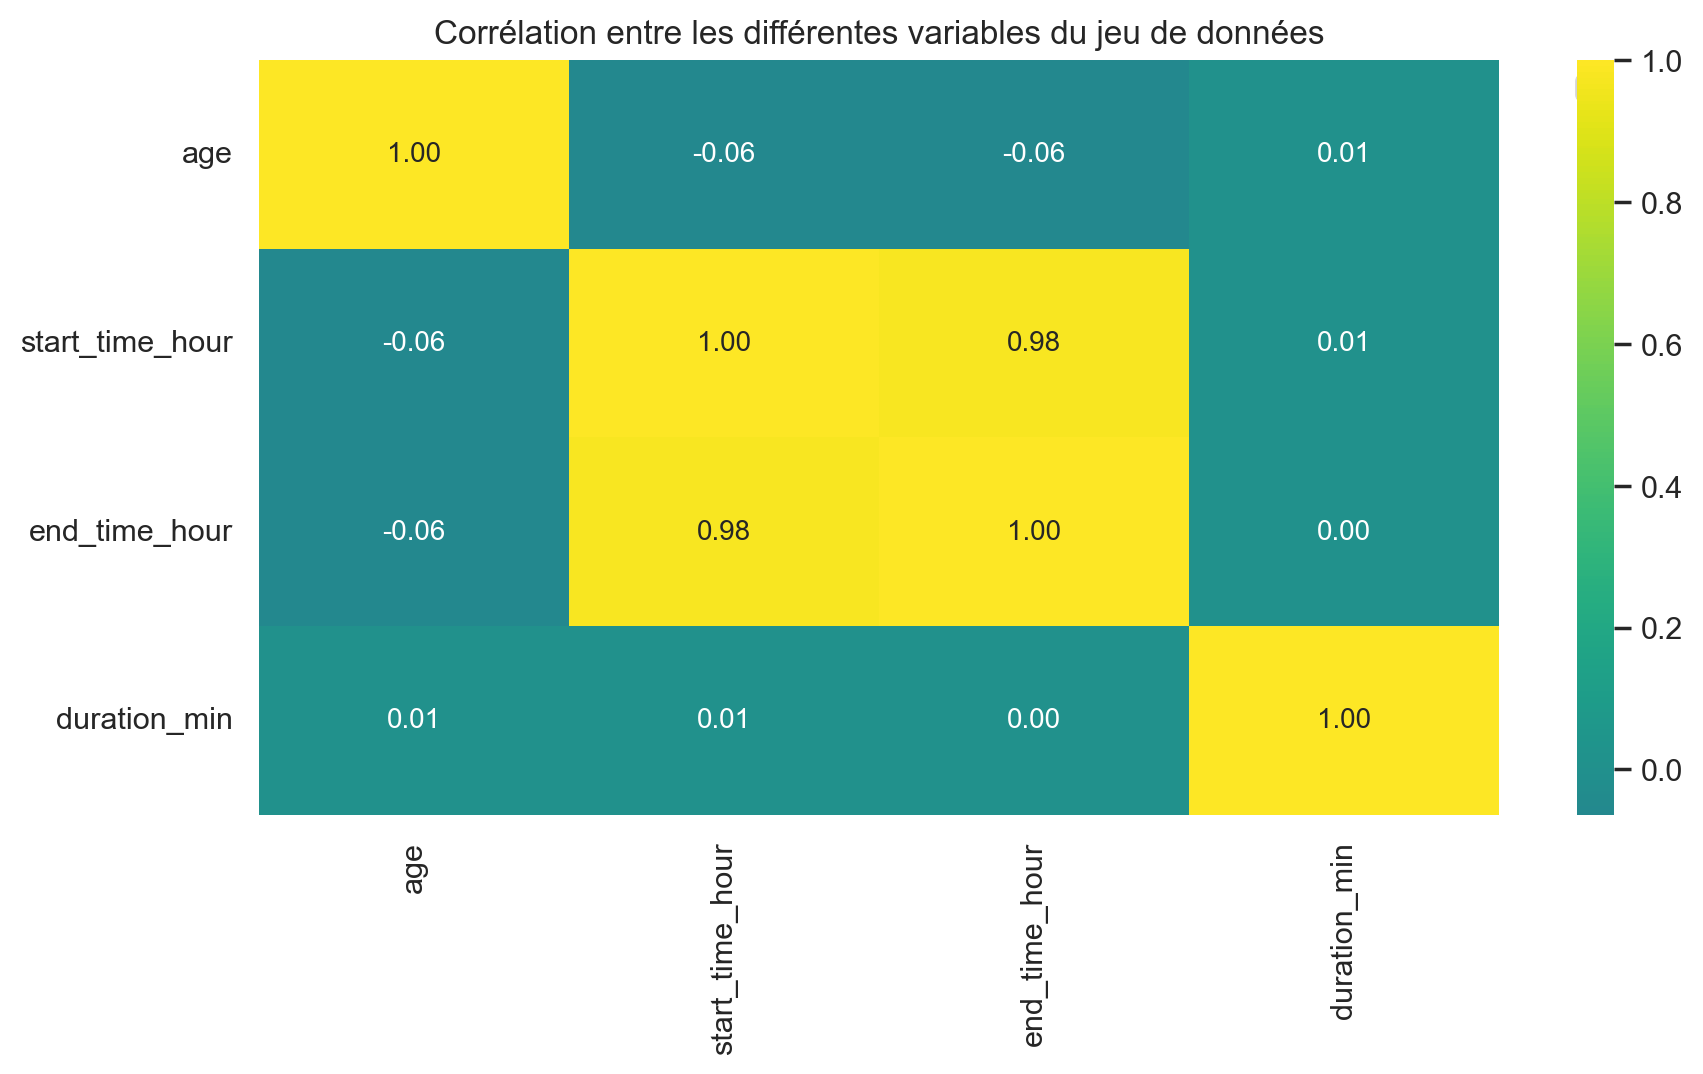

In [48]:
# Matrice de corrélation entre les variables du jeu de données

plt.figure(figsize = (10,5), dpi = 200)

sns.heatmap(data.corr(), annot = True, fmt = '.2f', cmap = 'viridis', center = 0)
plt.title("Corrélation entre les différentes variables du jeu de données")
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show();

Les graphiques ci-dessus montrent comment Corrélation entre chaque variable dans l'ensemble de données à l'aide de tracés de carte thermique :
- Il y a une corrélation négative entre l'âge et l'heure de début de trajet à vélo.
- Il y a une corrélation négative entre l'âge et l'heure de fin de trajet à vélo.

### Quelle est la variation moyenne de la durée du trajet en semaine entre les clients et les abonnés ?

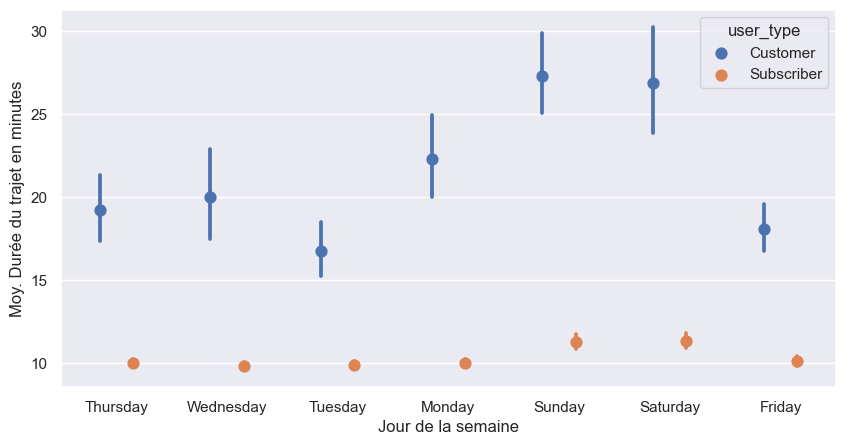

In [50]:
# Variation moyenne de la durée du trajet en semaine entre les clients et les abonnés
plt.figure(figsize = (10, 5), dpi = 100)
sns.pointplot(data=data, x='start_time_weekday', y='duration_min', hue='user_type', dodge=0.3, linestyles="");
plt.xlabel('Jour de la semaine');
plt.ylabel('Moy. Durée du trajet en minutes');

- Il ressort du graphique ci-dessus que les abonnés effectuent des trajets beaucoup plus courts/rapides que les clients chaque jour de la semaine.

<a id='conclusion'></a>
# Conclusion

- La plupart des utilisateurs étaient des hommes.
- La plupart des utilisateurs étaient abonnés.
- La distribution de la durée était étrange car les graphiques des minutes et des heures étaient de 30 minutes ou moins pour la plupart des utilisateurs.

<a id='limites'></a>
# Limites

- Présence de données manquantes pour certaines colonnes.
- Présence des valeurs aberrantes pour la colonne âge.